**1. Load and Explore the dataset**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/House Prices.csv")


In [2]:
# Display first few rows
print(df.head())

   ID             Date     Price  Bedrooms  Bathrooms  Sqft_living  Sqft_lot  \
0   1  20140916T000000  280000.0         6       3.00         2400      9373   
1   2  20150422T000000  300000.0         6       3.00         2400      9373   
2   3  20140508T000000  647500.0         4       1.75         2060     26036   
3   4  20140811T000000  400000.0         3       1.00         1460     43000   
4   5  20150401T000000  235000.0         3       1.00         1430      7599   

   Floors  Waterfront  View  ...  Grade  Sqft_above  Sqft_basement  Yr_built  \
0     2.0           0     0  ...      7        2400              0      1991   
1     2.0           0     0  ...      7        2400              0      1991   
2     1.0           0     0  ...      8        1160            900      1947   
3     1.0           0     0  ...      7        1460              0      1952   
4     1.5           0     0  ...      6        1010            420      1930   

   Yr_renovated  zipcode      Lat     

In [3]:
# General info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613 non-null  float64
 18  Long  

In [4]:
# Check for missing values
print(df.isnull().sum())

ID               0
Date             0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_living      0
Sqft_lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_above       0
Sqft_basement    0
Yr_built         0
Yr_renovated     0
zipcode          0
Lat              0
Long             0
Sqft_living15    0
Sqft_lot15       0
dtype: int64


In [5]:
# Summary statistics
print(df.describe())


                ID         Price      Bedrooms     Bathrooms   Sqft_living  \
count  21613.00000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   10807.00000  5.401822e+05      3.370842      2.114757   2079.899736   
std     6239.28002  3.673622e+05      0.930062      0.770163    918.440897   
min        1.00000  7.500000e+04      0.000000      0.000000    290.000000   
25%     5404.00000  3.219500e+05      3.000000      1.750000   1427.000000   
50%    10807.00000  4.500000e+05      3.000000      2.250000   1910.000000   
75%    16210.00000  6.450000e+05      4.000000      2.500000   2550.000000   
max    21613.00000  7.700000e+06     33.000000      8.000000  13540.000000   

           Sqft_lot        Floors    Waterfront          View     Condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.76631

**Step 2: Data Cleaning and Preprocessing**

In [9]:
# Remove ID and Date (not useful for regression)

df.drop(['ID', 'Date'], axis=1, inplace=True)


In [10]:
# Handle Missing Values
# Drop rows with missing values
df.dropna(inplace=True)


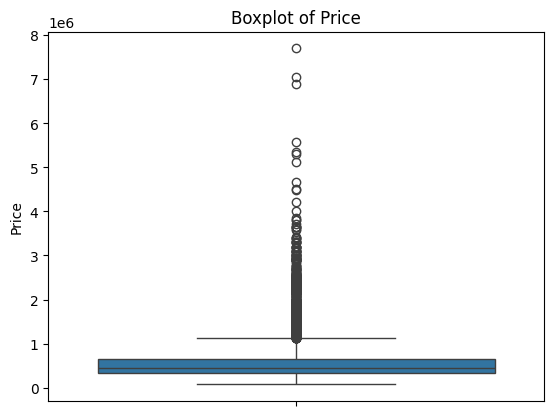

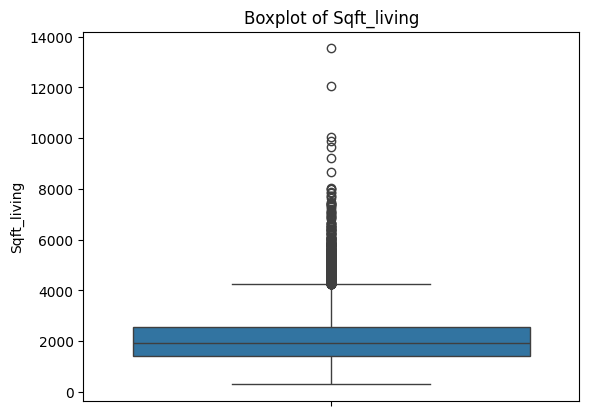

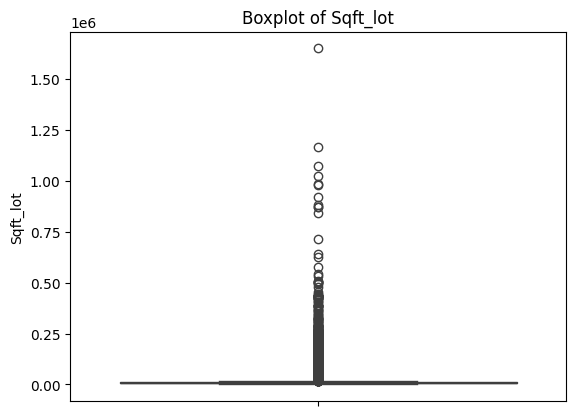

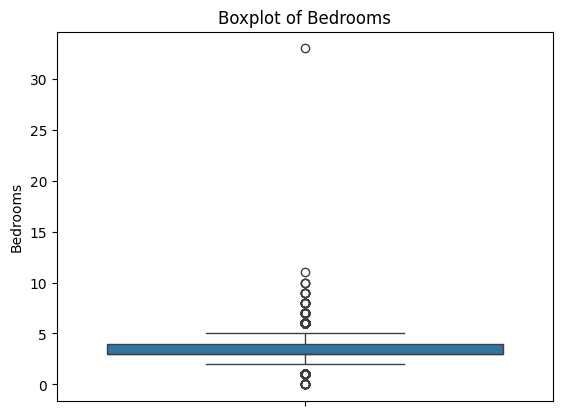

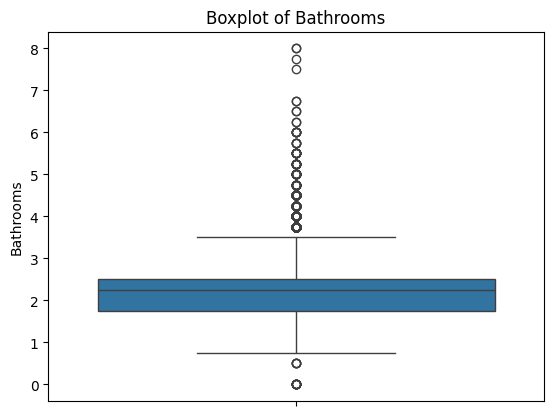

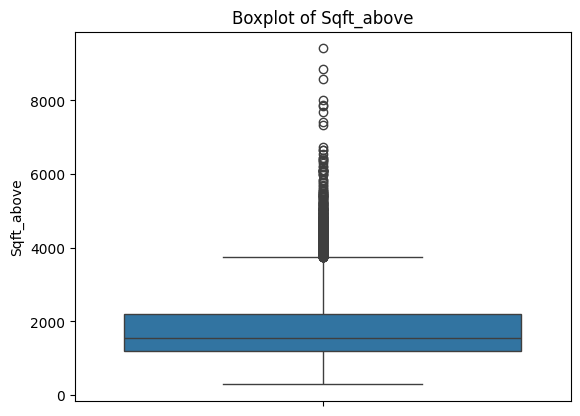

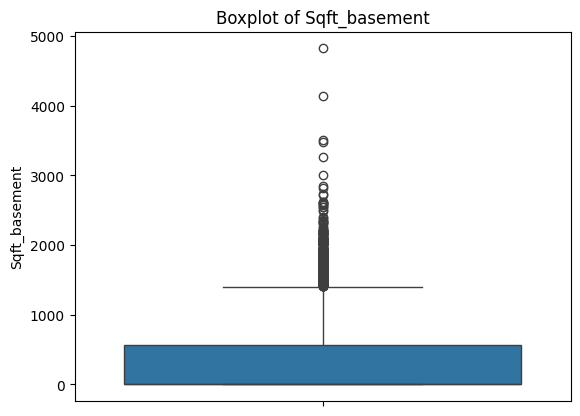

In [11]:
 # Check Outliers

 # Visualizing distributions
num_features = ['Price', 'Sqft_living', 'Sqft_lot', 'Bedrooms', 'Bathrooms', 'Sqft_above', 'Sqft_basement']
for feature in num_features:
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [14]:
# Normalize Numerical Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Bedrooms', 'Bathrooms', 'Sqft_living', 'Sqft_lot', 'Floors',
            'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated',
            'Sqft_living15', 'Sqft_lot15']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [15]:
# Encode Categorical Features
# Encode 'Waterfront', 'View', 'Condition', 'Grade', 'zipcode'


df = pd.get_dummies(df, columns=['Waterfront', 'View', 'Condition', 'Grade', 'zipcode'], drop_first=True)


**Step 3: Feature Selection & Correlation**

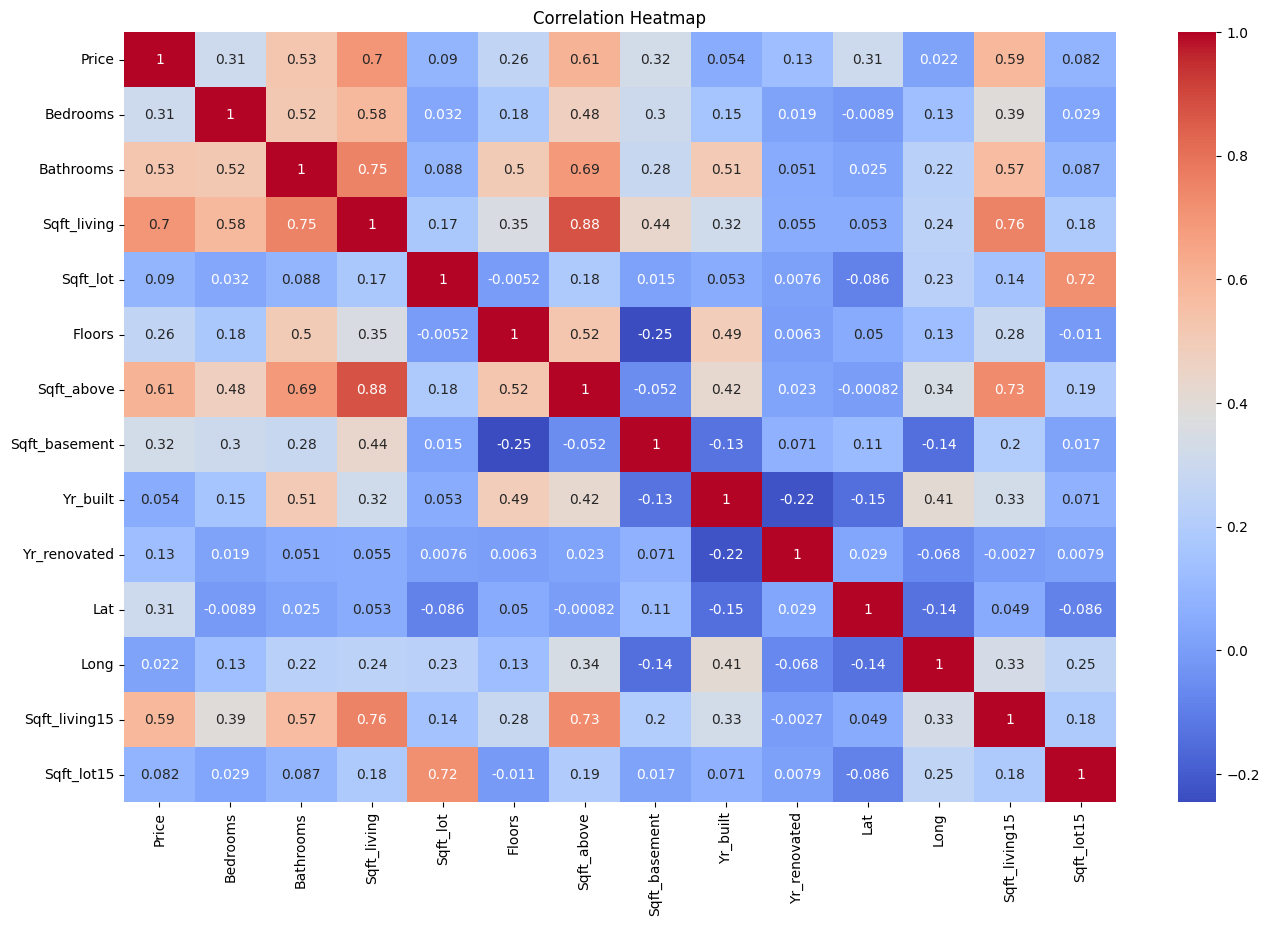

In [17]:
# Drop non-numeric columns like 'Date' and 'ID' if still present
df = df.drop(columns=['Date', 'ID'], errors='ignore')  # errors='ignore' prevents crash if already dropped

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Now  draw correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()


 Based on correlation, we can choose to drop features with very low correlation to Price.

**Step 4: Train-Test Split**

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Step 5: Train a Linear Regression Model**

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Step 6: Evaluate the Model**

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error (RMSE): 147833.49001856946
R² Score: 0.8173457673872497


**Step 7: Visualize Predictions**

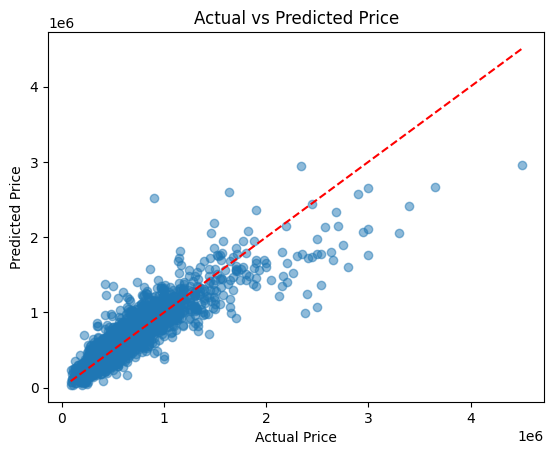

In [21]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


**Step 8: Feature Importance**

In [22]:
# Coefficients in descending order
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)


                Coefficient
Grade_13       1.824167e+06
zipcode_98039  1.174647e+06
zipcode_98004  7.254733e+05
Grade_12       7.182281e+05
zipcode_98112  5.696424e+05
...                     ...
Grade_8       -9.046441e+04
Grade_5       -1.093782e+05
Grade_7       -1.103440e+05
Grade_6       -1.105550e+05
Long          -1.868892e+05

[102 rows x 1 columns]


**Final Deliverables Summary**

| Deliverable          | Description                              |
| -------------------- | ---------------------------------------- |
|  Trained Model      | Linear Regression using scikit-learn     |
|  Predictions        | Predicted vs. Actual House Prices        |
|  Evaluation Metrics | RMSE and R² Score                        |
|  Feature Insights   | Top predictors with largest coefficients |


**Expected Insights**


1. Larger Sqft_living, more Bathrooms, higher Grade → increase price.

2. Location (zipcode), View, Waterfront have strong pricing effects.

3. Older Yr_built → potential decrease unless Yr_renovated is recent.

4. RMSE & R² tell us how good the model is for real-world use.